In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

tf.__version__

import matplotlib.pyplot as plt

In [3]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

train_img_dirs = os.listdir("../data")
print(train_img_dirs)
NUM_CLASSES = len(train_img_dirs) # 分類するクラス数
#print(NUM_CLASSES)
IMG_SIZE = 28 # 画像の1辺の長さ

['neji_10', 'neji_40', 'nat', 'washer', 'neji_25']


In [4]:
model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(IMG_SIZE*IMG_SIZE*3,)),#784
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation=tf.keras.activations.softmax)
  ])

model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
model.load_weights(checkpoint_path)

W0811 02:15:51.582554 139882934314816 deprecation.py:506] From /home/yuto/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1633: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
# 学習画像データ
images = []
# 学習データのラベル
labels = []
# ./data/以下の各ディレクトリ内のファイル名取得
files = os.listdir('./AR/imgs/')
for f in files:
    # 画像読み込み
    img = cv2.imread('./AR/imgs/' + f)
    # 1辺がIMG_SIZEの正方形にリサイズ
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    # 1列にして ####この処理はなくす
    img = img.flatten().astype(np.float32)/255.0
    images.append(img)

    # one_hot_vectorを作りラベルとして追加 ######変更
    #tmp = np.zeros(NUM_CLASSES)
    #tmp[i] = 1
    tmp = 0
    labels.append(tmp)
# numpy配列に変換
images = np.asarray(images)
labels = np.asarray(labels)

labels = labels[:1000]
print(len(images), len(labels))

8 8


In [6]:

loss,acc = model.evaluate(images, labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

8/8 [==============================] - 0s 9ms/sample - loss: 5.8814 - acc: 0.1250
Restored model, accuracy: 12.50%


In [7]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(train_img_dirs[predicted_label],
                                    100*np.max(predictions_array),
                                    train_img_dirs[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [8]:
print(images.shape)
predictions = model.predict(images)
for i in range(len(predictions)):
    print("result: ",train_img_dirs[np.argmax(predictions[i])].rjust(6),"     answer:",train_img_dirs[labels[i]].rjust(6))

(8, 2352)
result:  neji_40      answer: neji_10
result:     nat      answer: neji_10
result:  neji_25      answer: neji_10
result:  neji_40      answer: neji_10
result:  neji_10      answer: neji_10
result:  neji_40      answer: neji_10
result:     nat      answer: neji_10
result:  neji_25      answer: neji_10


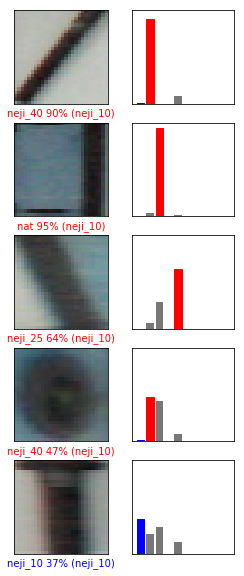

In [9]:
test_images_fig = []
for i in range(len(images)):
    test_images_fig.append(np.reshape(images[i], (IMG_SIZE,IMG_SIZE,3)))
num_rows = NUM_CLASSES
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, labels, test_images_fig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, labels)
plt.show()